In [95]:
import pandas as pd
import numpy as np

df_dep= pd.read_csv(r'csv/departamentos.csv')
df_casas= pd.read_csv(r'csv/casas.csv')

In [96]:
#limpiar precio
def limpiar(precios):
    lista=precios
    lista=lista.str.replace("MN ", "", regex=True).str.replace("$","",regex=False).str.replace(",","",regex=False)
    lista=pd.to_numeric(lista,errors="coerce")    
    return lista
df_dep['nprecio']=limpiar(df_dep['precio'])
df_dep['nprecio']=df_dep['nprecio'].replace(0,np.NaN)

#casas
df_casas['nprecio']=limpiar(df_casas['precio'])
df_casas['nprecio']=df_casas['nprecio'].replace(0,np.NaN)

In [97]:
#limpiar mts2
def limpiar_m(metros):
    lista=metros
    lista=lista.str.replace("m²","",regex=True)
    lista=pd.to_numeric(lista,errors="coerce")
    return lista
df_dep['nmetros']=limpiar_m(df_dep['mets'])
df_dep['nmetros']=df_dep['nmetros'].replace(0,np.NaN)

#casas
df_casas['nmetros']=limpiar_m(df_casas['mets'])
df_casas['nmetros']=df_casas['nmetros'].replace(0,np.NaN)

In [98]:
#departamentos
df_cdep = df_dep[df_dep['web-scraper-start-url'].str.contains("campanario", na=False, case=False)]
df_cdep.reset_index(drop=True, inplace=True)
#df_cdep.loc[:,['titulo','nprecio','nmetros']]

#casas
df_ccasas = df_casas[df_casas['web-scraper-start-url'].str.contains("campanario", na=False, case=False)]
df_ccasas.reset_index(drop=True, inplace=True)
#print(len(df_ccasas))
#df_ccasas.loc[:,['titulo','nprecio','nmetros']]

In [108]:
#DEPARTAMENTOS
from sklearn import linear_model
from sklearn.model_selection import train_test_split
metros=df_cdep['nmetros']
precios=df_cdep['nprecio']

metros = np.array(metros).reshape(-1,1)
precios = np.array(precios).reshape(-1,1)
metros.astype(np.float64)
precios.astype(np.float64)
#numpy.isfinite(X_train).all()
X_train, X_test, y_train, y_test = train_test_split(metros, precios, test_size=0.2, random_state=0)


In [109]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [110]:
#DEPARTAMENTOS
print(X_test)
print(y_test)

[[109]
 [ 92]
 [ 40]
 [120]
 [ 67]
 [ 60]
 [ 52]
 [ 75]
 [ 74]
 [125]
 [ 80]
 [140]
 [210]
 [ 76]
 [140]
 [201]
 [ 40]
 [110]
 [ 76]
 [ 74]
 [ 76]
 [120]
 [133]
 [ 72]
 [ 40]
 [128]
 [ 40]
 [158]
 [ 78]
 [ 70]
 [125]
 [120]
 [118]
 [ 76]
 [150]
 [ 70]]
[[25000.]
 [16500.]
 [20500.]
 [29000.]
 [18500.]
 [14500.]
 [14000.]
 [18000.]
 [18000.]
 [27000.]
 [18000.]
 [18000.]
 [23890.]
 [25000.]
 [17000.]
 [24000.]
 [20500.]
 [24000.]
 [14900.]
 [18000.]
 [25000.]
 [29000.]
 [24000.]
 [14900.]
 [17500.]
 [22000.]
 [22500.]
 [20000.]
 [23000.]
 [18000.]
 [24000.]
 [29000.]
 [18000.]
 [25000.]
 [22000.]
 [12900.]]


In [111]:
#model.predict(X_test)
model.predict([[96]])

array([[20412.95957254]])

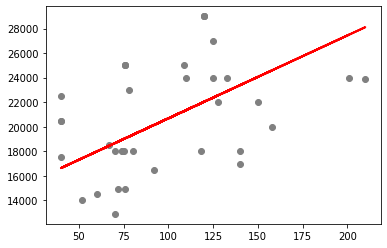

In [103]:
import matplotlib.pyplot as plt 

y_pred = model.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [104]:
#CASAS
from sklearn import linear_model
from sklearn.model_selection import train_test_split

metrosC=df_ccasas['nmetros']
preciosC=df_ccasas['nprecio']

metrosC = np.array(metrosC).reshape(-1,1)
preciosC = np.array(preciosC).reshape(-1,1)
metrosC.astype(np.float64)
preciosC.astype(np.float64)
#numpy.isfinite(X_train).all()
XC_train, XC_test, yC_train, yC_test = train_test_split(metrosC, preciosC, test_size=0.2, random_state=0)

modelC = linear_model.LinearRegression()
modelC.fit(XC_train,yC_train)
modelC.predict(XC_test)
#modelC.predict([[109]])

array([[14769500.91251014],
       [10988820.71521009],
       [19259058.64680396],
       [18865237.79291854],
       [28710759.1400541 ],
       [19849789.92763209],
       [16896133.52349142],
       [17486864.80431956],
       [16896133.52349142],
       [29695311.27476765],
       [19889172.01302063],
       [30581408.19600985],
       [18865237.79291854],
       [18884928.83561281],
       [18865237.79291854],
       [19318131.77488677],
       [18865237.79291854],
       [27509605.53570356],
       [21621983.77011649],
       [29695311.27476765],
       [20834342.06234565],
       [21897658.36783629],
       [18865237.79291854],
       [19101530.30524979],
       [20834342.06234565],
       [35346640.52802347],
       [20834342.06234565],
       [19849789.92763209],
       [16364475.3707461 ],
       [18865237.79291854],
       [18865237.79291854],
       [19259058.64680396],
       [29911912.74440464],
       [29892221.70171037],
       [19849789.92763209],
       [27509605.535

In [105]:
print(XC_test)
print(yC_test)

[[ 492.]
 [ 300.]
 [ 720.]
 [ 700.]
 [1200.]
 [ 750.]
 [ 600.]
 [ 630.]
 [ 600.]
 [1250.]
 [ 752.]
 [1295.]
 [ 700.]
 [ 701.]
 [ 700.]
 [ 723.]
 [ 700.]
 [1139.]
 [ 840.]
 [1250.]
 [ 800.]
 [ 854.]
 [ 700.]
 [ 712.]
 [ 800.]
 [1537.]
 [ 800.]
 [ 750.]
 [ 573.]
 [ 700.]
 [ 700.]
 [ 720.]
 [1261.]
 [1260.]
 [ 750.]
 [1139.]
 [ 636.]
 [1800.]
 [ 702.]
 [ 700.]
 [ 430.]
 [1282.]
 [1367.]
 [ 700.]
 [ 700.]
 [ 750.]
 [ 600.]
 [ 715.]
 [ 730.]
 [ 612.]
 [ 630.]
 [ 747.]
 [ 814.]
 [ 700.]
 [ 267.]
 [2500.]
 [ 800.]
 [ 708.]
 [1139.]
 [ 600.]
 [ 610.]
 [ 700.]
 [1800.]
 [ 700.]
 [ 810.]
 [1366.]
 [ 592.]
 [ 612.]
 [1324.]
 [ 770.]
 [1104.]
 [1250.]
 [ 271.]
 [ 700.]
 [ 150.]
 [ 735.]
 [ 600.]
 [ 940.]
 [ 730.]
 [ 801.]
 [1250.]
 [ 600.]
 [ 814.]
 [ 700.]]
[[17500000.]
 [ 7750000.]
 [15400000.]
 [19990000.]
 [40000000.]
 [18800000.]
 [13500000.]
 [17300000.]
 [22000000.]
 [38000000.]
 [18950000.]
 [29674117.]
 [19990000.]
 [16950000.]
 [19990000.]
 [18500000.]
 [19990000.]
 [28550000.]
 [2100000

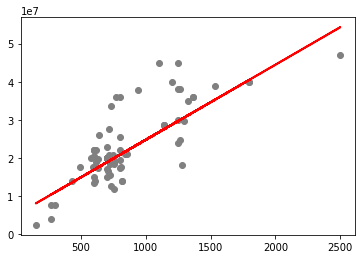

In [107]:
import matplotlib.pyplot as plt 
y1_pred = modelC.predict(XC_test)
plt.scatter(XC_test, yC_test,  color='gray')
plt.plot(XC_test, y1_pred, color='red', linewidth=2)
plt.show()